This is the second homework assignment for *Lasers and Optomechanics* at Syracuse University.

**It is due Monday, February 16, 2026**

**<span style="color:#ff5555;">You will need to complete the questions in this jupyter notebook and submit it via `gitlab`</span>**


## <span style="color:#ff9900">Readings</span>

Chapter 1 of *Lasers* by Seigman: [Free eBook](https://opg-optica-org.libezproxy2.syr.edu/content/bookshelf/book/item/lasers)

# <span style="color:rgb(255, 0, 200)">Questions 1 & 2 work </a>

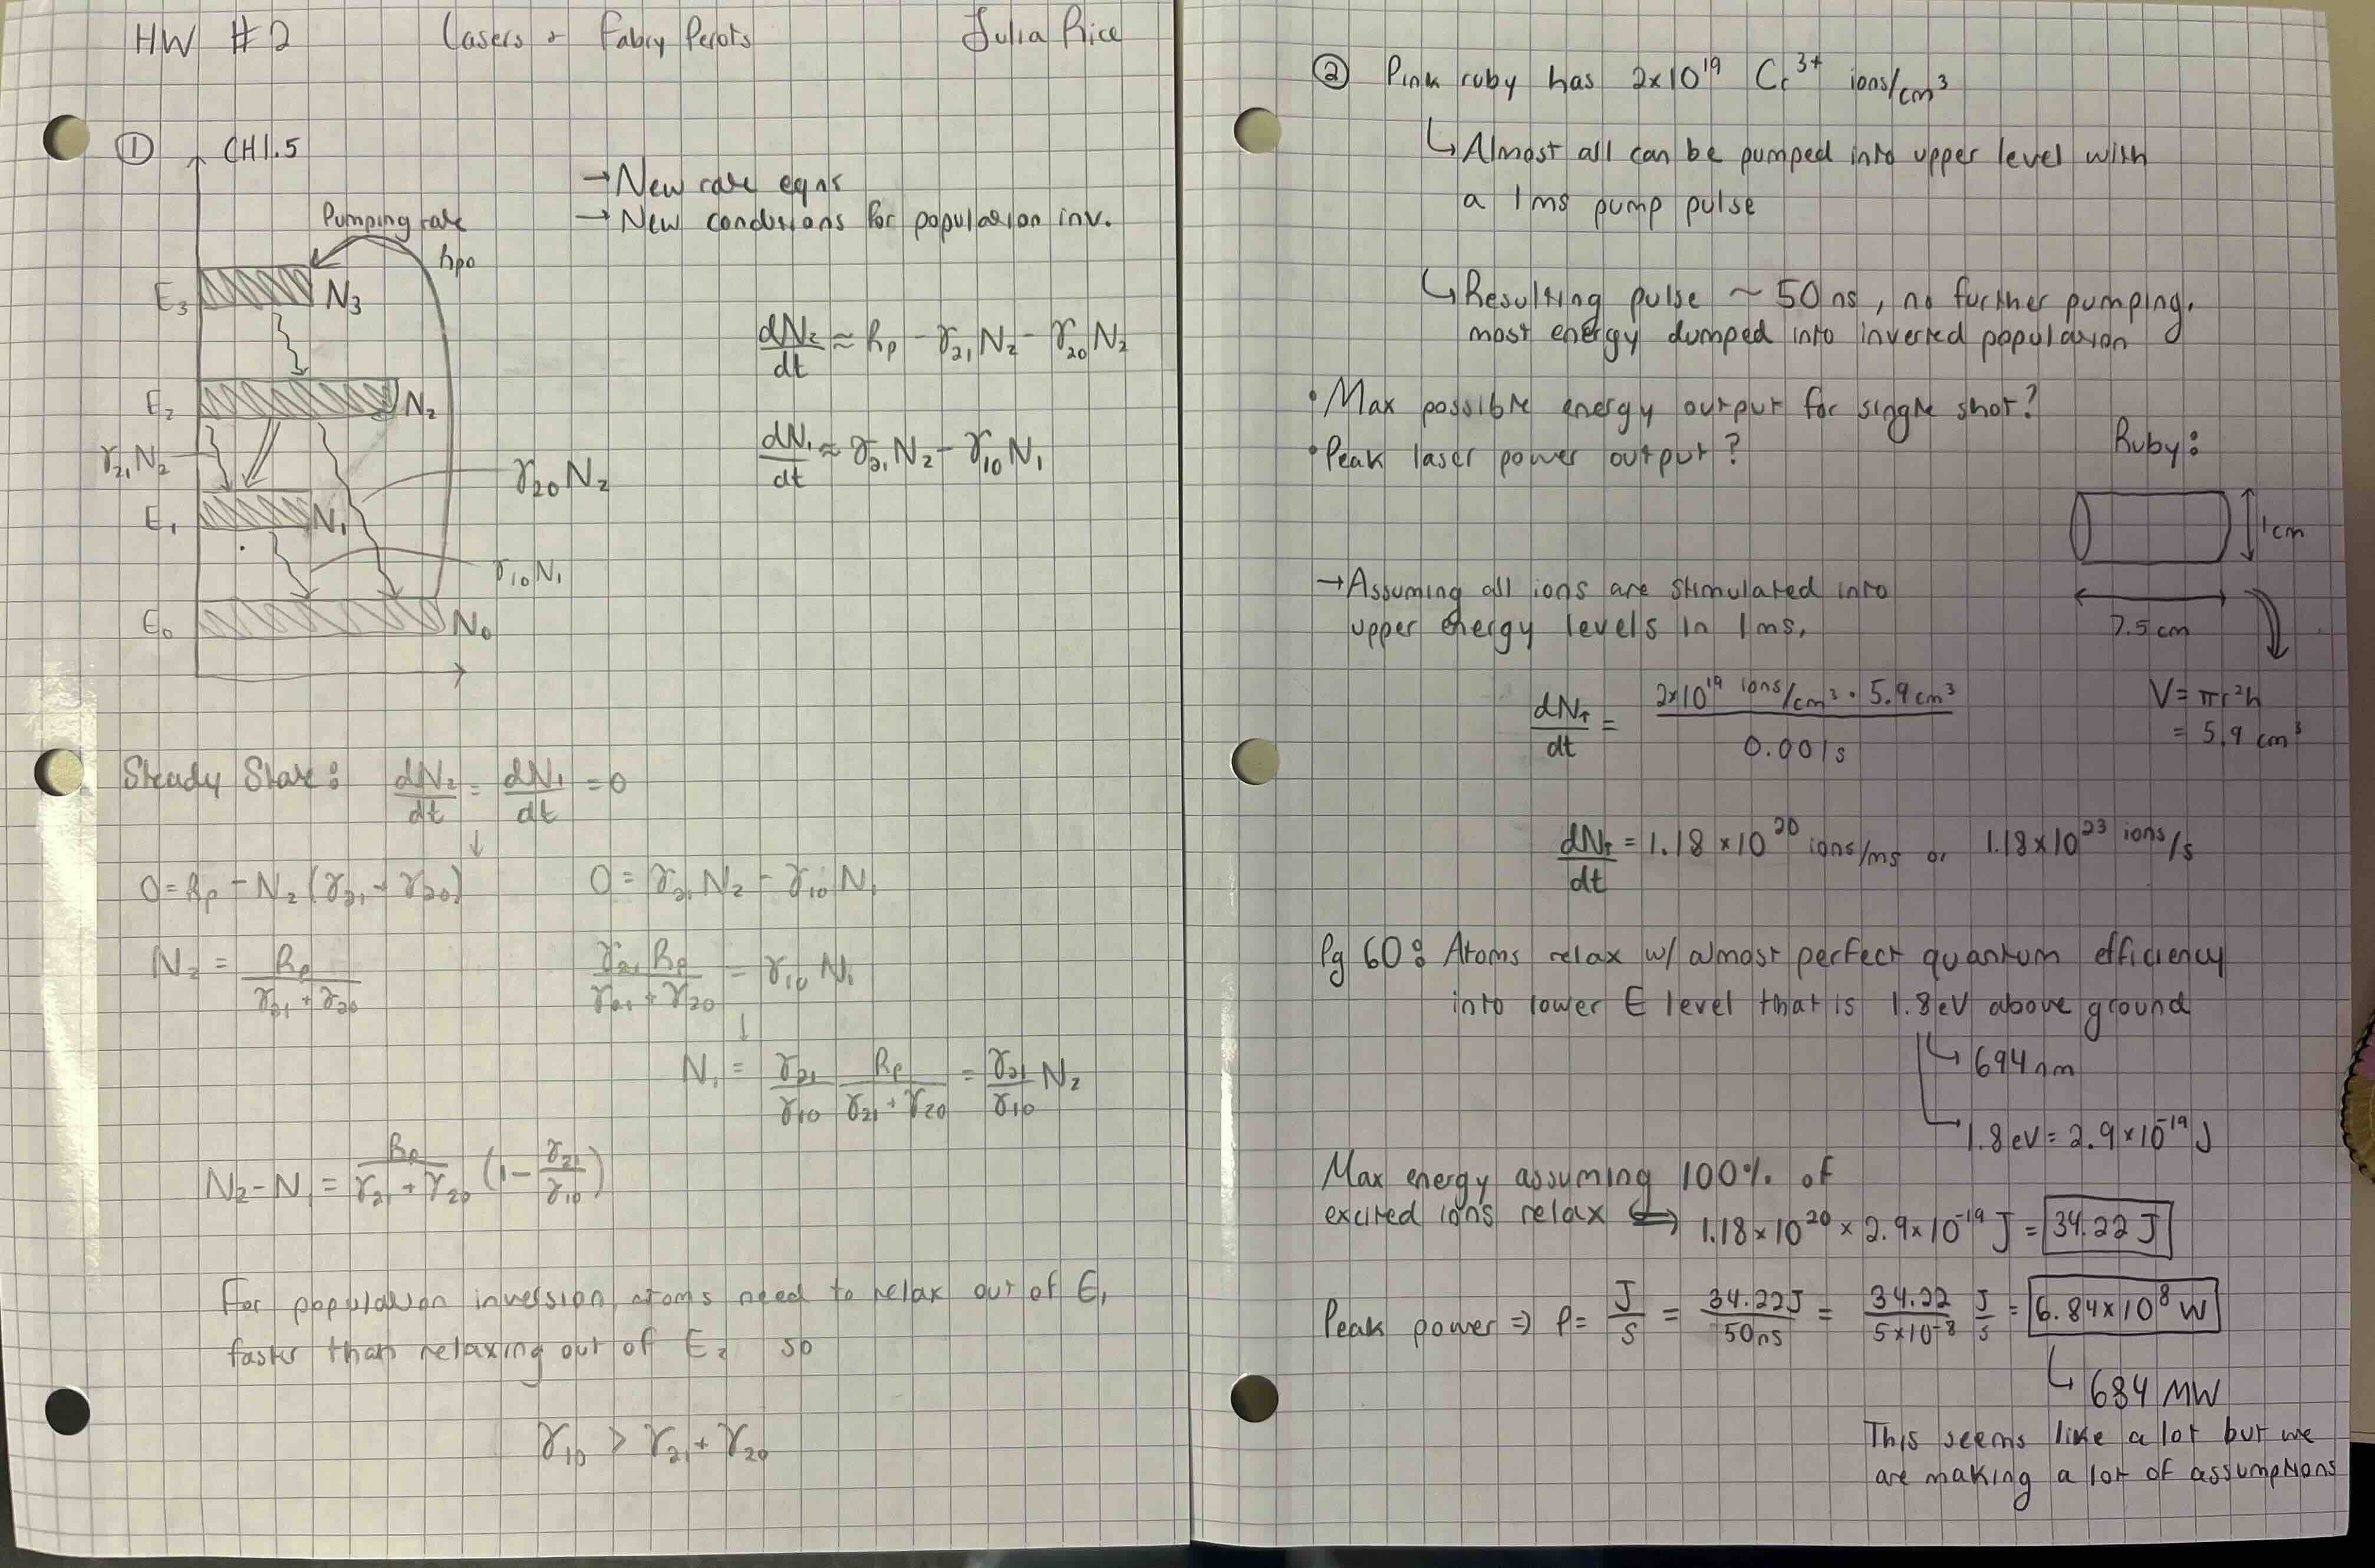

# <span style="color:rgb(255, 0, 200)">Question 2.1 & 3 work </a>
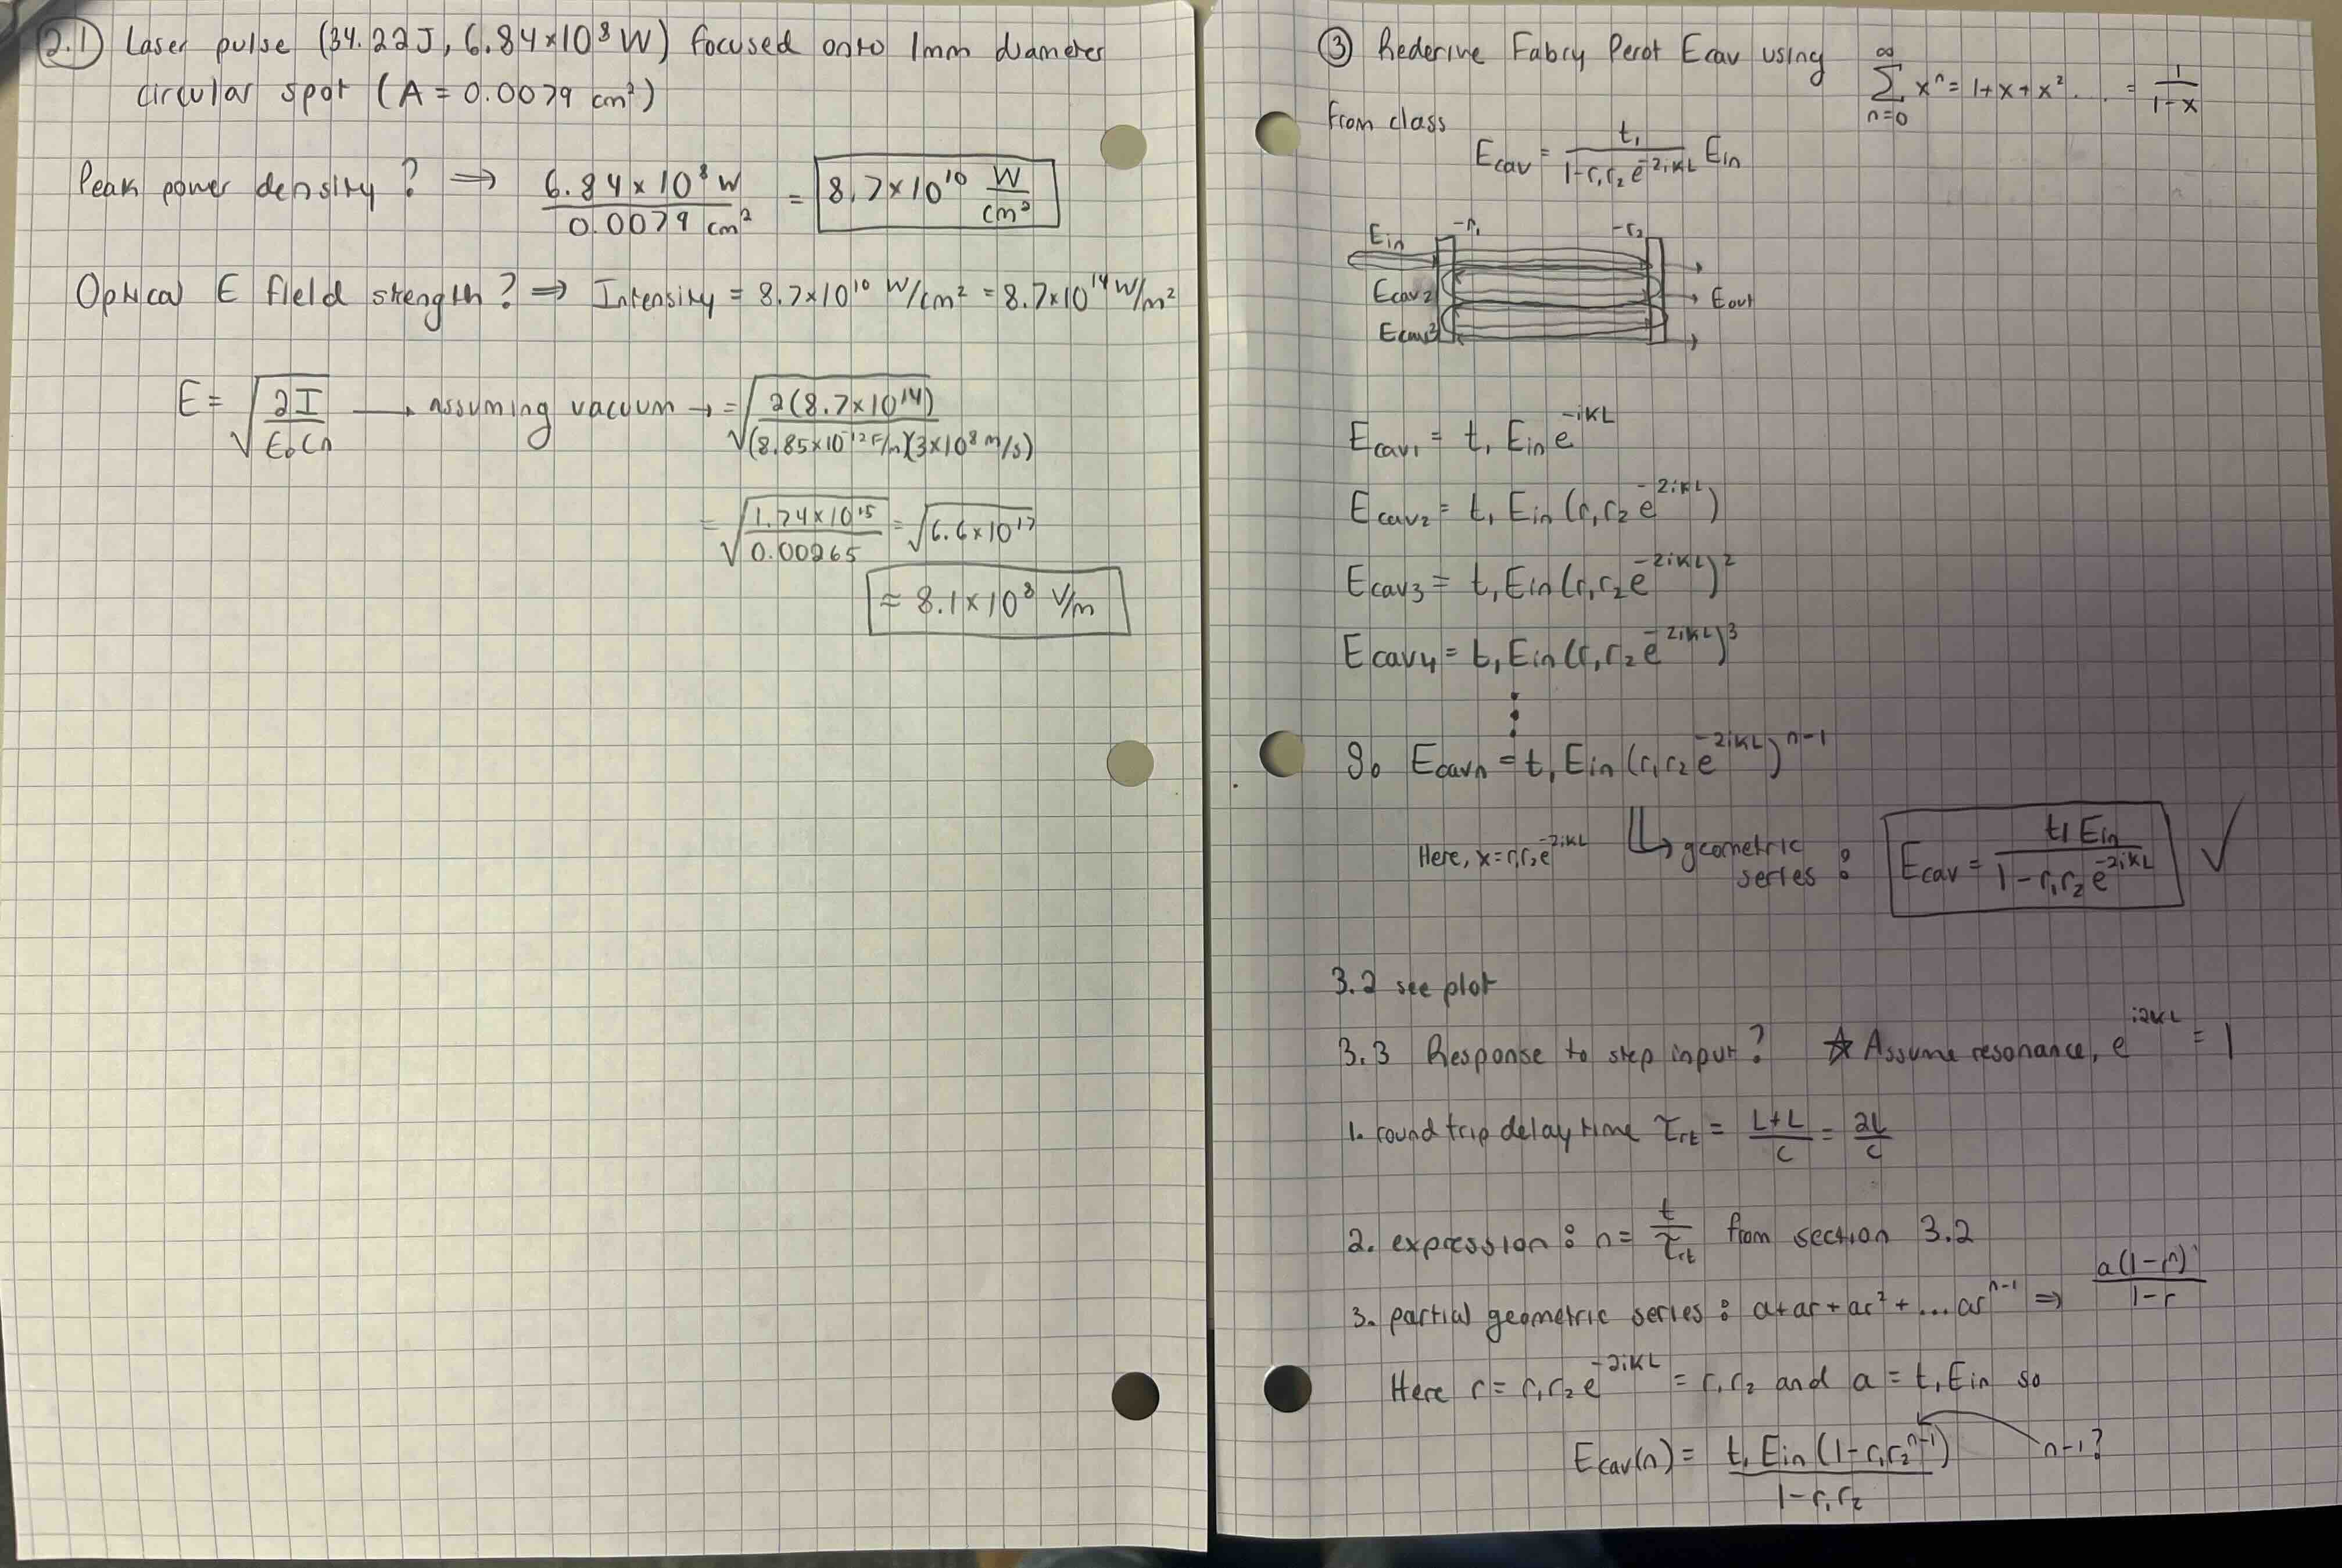

# <span style="color:rgb(255, 0, 200)">Questions 3 & 4 work </a>

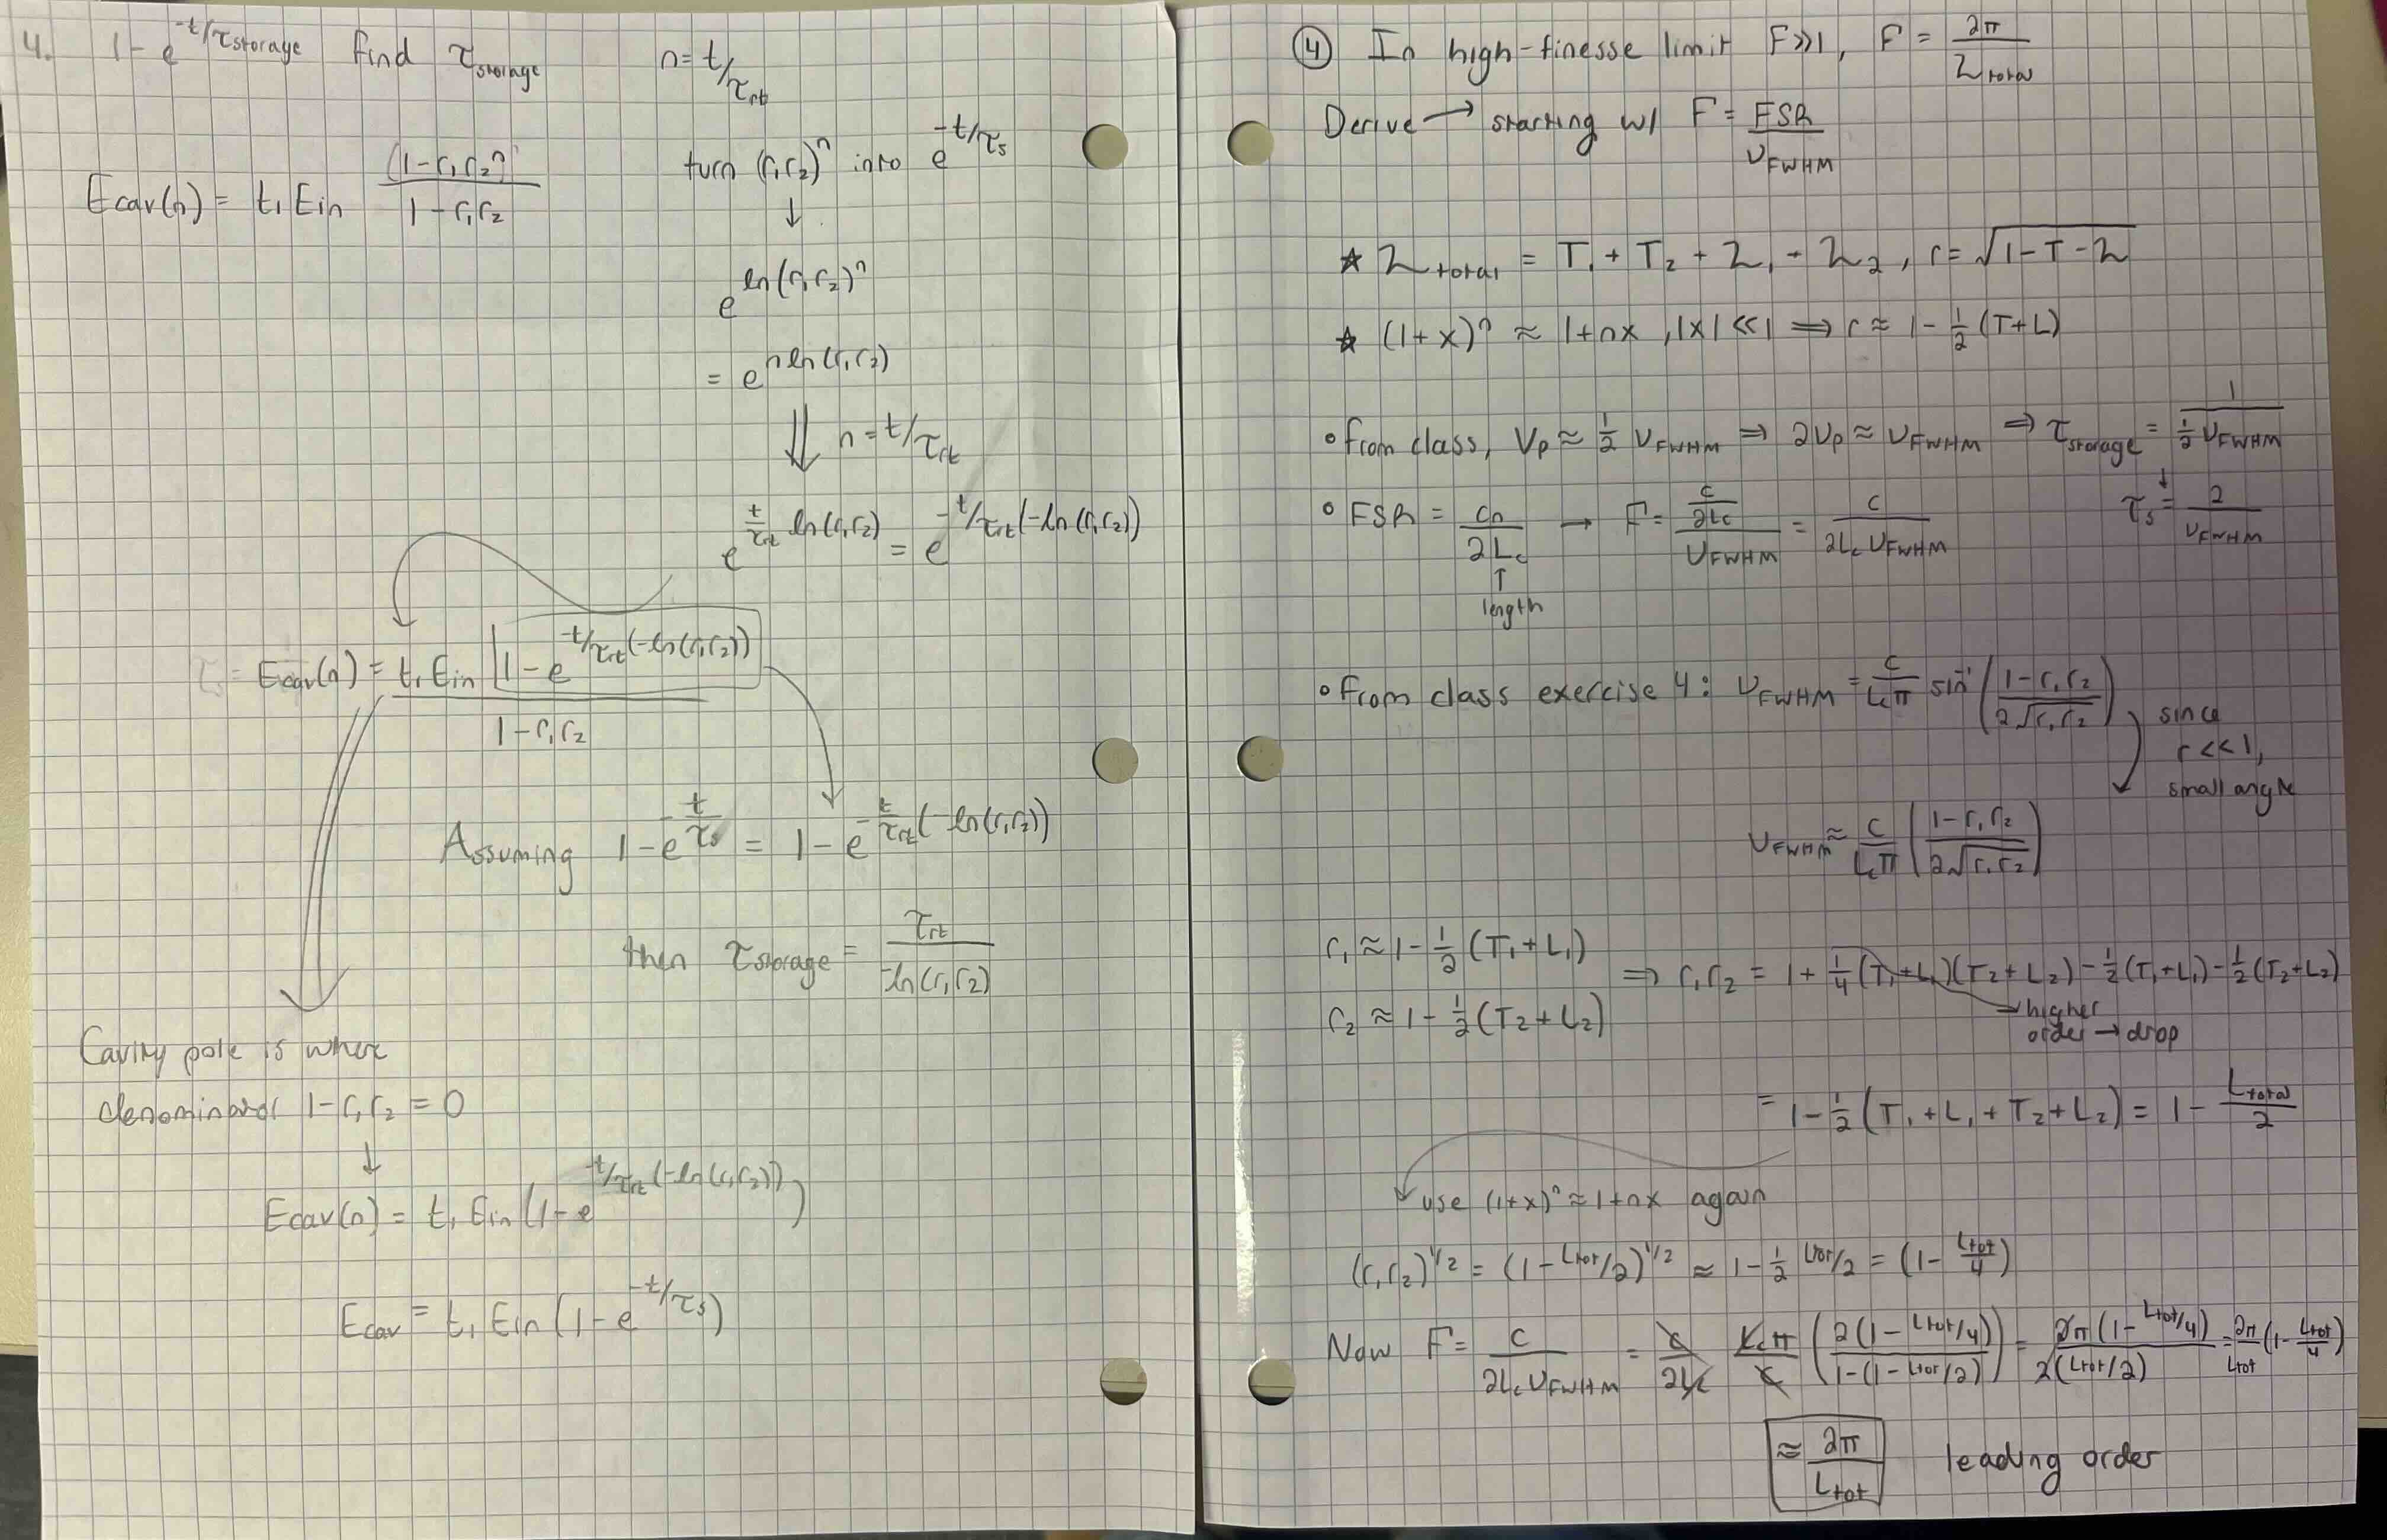

# <span style="color:rgb(255, 0, 200)">Questions 5 and 6 work </a>

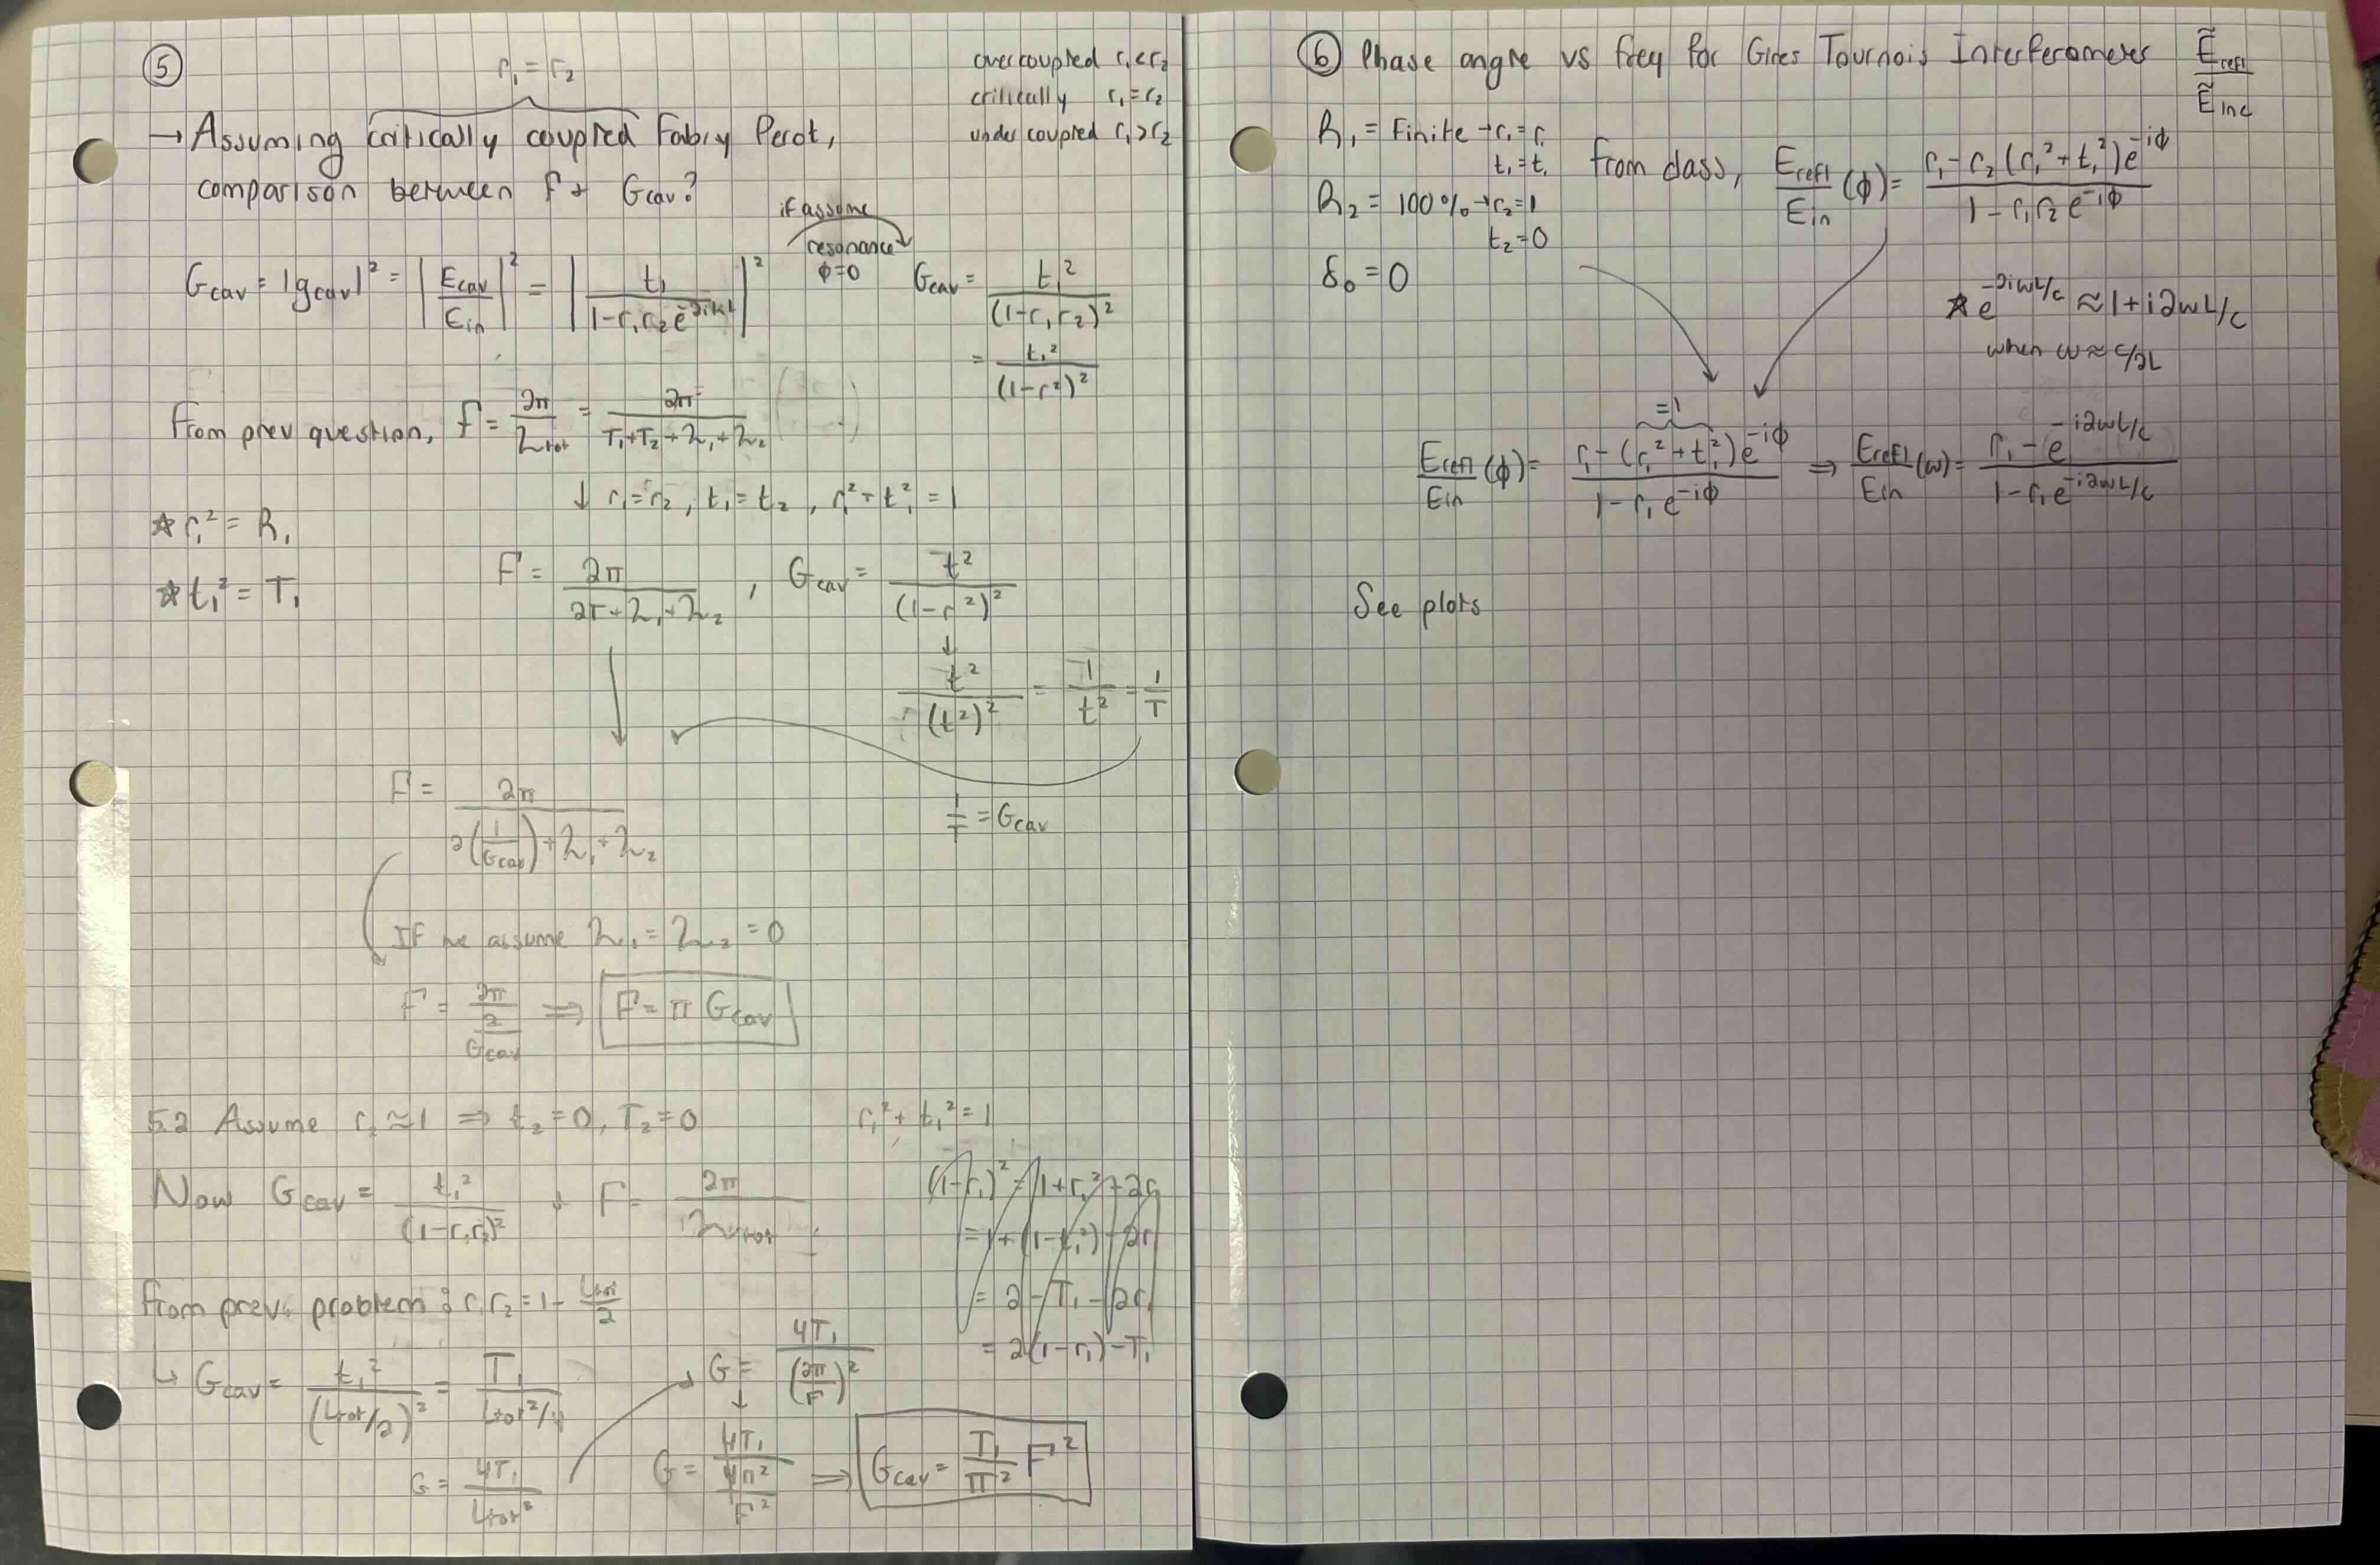

# <span style="color:rgb(255, 0, 200)">Question 3.2 plot</a>

In [8]:
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

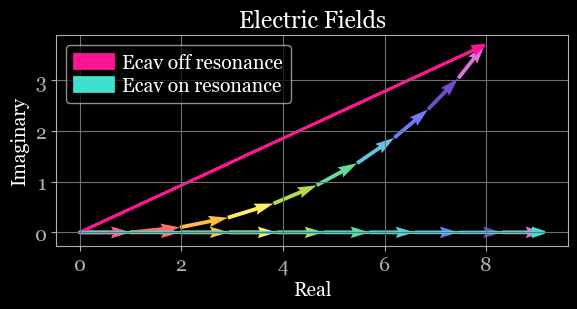

In [77]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
ns = np.arange(N)

phi = 0.1 
phi_res = 0       
r1 = 0.99
r2 = 0.99
E0 = 1


En = E0 * (r1*r2)**ns * np.exp(1j * ns * phi)
En_res = E0 * (r1*r2)**ns * np.exp(1j * ns * 0)

e_tot = np.cumsum(En)
e_tot_res = np.cumsum(En_res)

re_tail = np.concatenate(([0], e_tot.real[:-1]))
im_tail = np.concatenate(([0], e_tot.imag[:-1]))
re_tail_res = np.concatenate(([0], e_tot_res.real[:-1]))
im_tail_res = np.concatenate(([0], e_tot_res.imag[:-1]))

re = En.real
im = En.imag
re_res = En_res.real
im_res = En_res.imag

colors = ["#ff5b8c","#ff7066","#ffbf3e","#ffed62","#b3db4f","#62dd99","#62c3e3","#7279F8","#734ec8","#DE74D9"]


fig, ax = plt.subplots(figsize=(6,6))

ax.quiver(re_tail, im_tail, re, im, angles='xy', scale_units='xy', scale=1 ,color=colors)
ax.quiver(re_tail_res, im_tail_res, re_res, im_res, angles='xy', scale_units='xy', scale=1 ,color=colors)

total = e_tot[-1]
total_res = e_tot_res[-1]
ax.arrow(0, 0, total.real, total.imag, color='deeppink',lw=2,head_width = 0.15, length_includes_head=True, label='Ecav off resonance')
ax.arrow(0, 0, total_res.real, total_res.imag, color='turquoise',lw=2,head_width = 0.15, length_includes_head=True, label='Ecav on resonance')

ax.set_aspect('equal')
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
ax.set_title("Electric Fields")
ax.grid()
ax.legend()
plt.show()


# <span style="color:rgb(255, 0, 200)">Question 6: Plot</a>

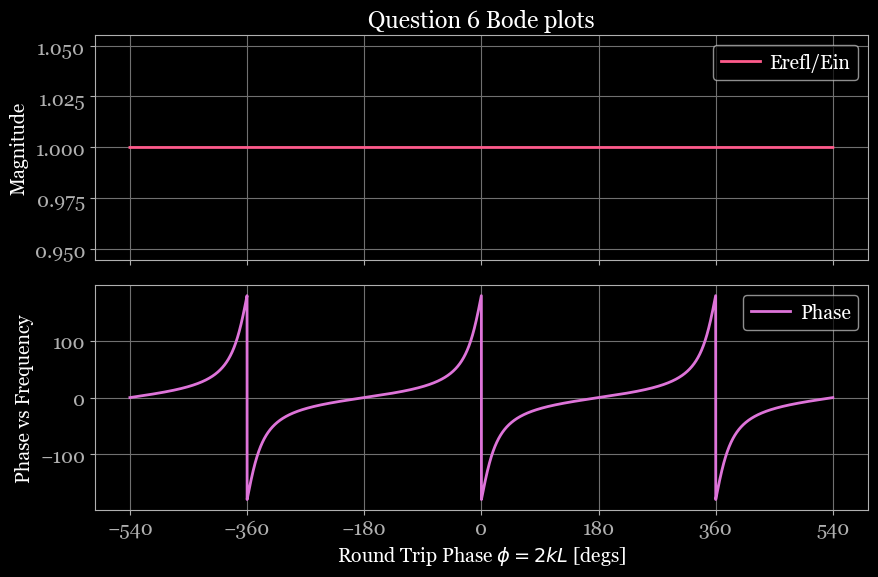

In [105]:
'''
I pretty much just copied your code from 2.2 to make my life easier lol
'''

def ecav_fp(phis2, ein, trans1, trans2, loss1=0, loss2=0):
    t1 = np.sqrt(trans1)
    t2 = np.sqrt(trans2)
    r1 = np.sqrt(1 - trans1)
    r2 = np.sqrt(1 - trans2)
    
    #ecav = ein * t1 / (1 - r1 * r2 * np.exp(-1j * phis))
    Erefl = r1 - np.exp(1j * phis2)
    Ein = 1 - r1*np.exp(1j * phis2)

    return Erefl/Ein

phis2 = np.linspace(-3*np.pi, 3*np.pi, 10000)

trans1 = 0.5
trans2 = 0
loss1 = 0 
loss2 = 0
ein = 1 

ecav = ecav_fp(phis2, ein, trans1, trans2, loss1, loss2)

fig2, (ax21, ax22) = plt.subplots(2, sharex=True)

ax21.plot(180/np.pi*phis2, np.abs(ecav), label="Erefl/Ein", color = "#ff5b8c", lw=2)
ax22.plot(180/np.pi*phis2, np.angle(ecav, deg=True), label=r"Phase", color = "#DE74D9", lw=2)

ax21.set_xticks(180*np.arange(-3,4))
ax21.grid()
ax21.set_title("Question 6 Bode plots")
ax21.set_ylabel(r"Magnitude")
ax21.legend()

ax22.grid()

ax22.set_xlabel(r"Round Trip Phase $\phi = 2 k L$ [degs]")
ax22.set_ylabel(r"Phase vs Frequency")
ax22.legend()

plt.show()
